# <center>ScatNet 2D for image classification<center>

## Load libraries

In [1]:
# Install missing packages

# Libraries
import os
from zipfile import ZipFile
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import DataLoader
from kymatio.torch import Scattering2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from utils import CustomDataset, compute_metrics
from ScatNet_TO_DO import ScatNet2D
from torchinfo import summary


# Style for chart
sns.set_style('darkgrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\ProgramData\Anaconda3\envs\technica\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Load data and Create datasets

labels:
* babesiosis = 0
* plasmodium-gametocyte = 1
* trypanosomiasis = 2

In [3]:
# zipfile = ZipFile('BloodSmearImages.zip')
# zipfile.extractall()
# zipfile.close()

In [2]:
# Load each class separately, convert in grayscale and normalize in [0,1]
data_babesiosis = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) for file in glob.glob('classifyBloodSmearImages/BloodSmearImages/babesiosis/*.jpg')])
labels_zeros = np.repeat(0, data_babesiosis.shape[0])

data_plasmodium = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) for file in glob.glob('classifyBloodSmearImages/BloodSmearImages/plasmodium-gametocyte/*.jpg')])
labels_ones = np.repeat(1, data_plasmodium.shape[0])

data_trypanosomiasis = np.array([cv2.normalize(cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY), None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F) for file in glob.glob('classifyBloodSmearImages/BloodSmearImages/trypanosomiasis/*.jpg')])
labels_two = np.repeat(2, data_trypanosomiasis.shape[0])

print('Shape class babesiosis (0): \t\t', data_babesiosis.shape)
print('Shape class plasmodium-gametocyte (1): \t', data_plasmodium.shape)
print('Shape class trypanosomiasis (2): \t', data_trypanosomiasis.shape)


# Create the whole dataset and resize the images from 300x300 to 100x100 (due to computational time)
image_size = 100
data = np.concatenate((data_babesiosis, data_plasmodium, data_trypanosomiasis), axis=0)
data_resized = np.array([cv2.resize(data[i,:,:], (image_size,image_size)) for i in range(data.shape[0])])
labels = np.concatenate((labels_zeros, labels_ones, labels_two), axis=0)

print('Dataset size: \t\t', data.shape)
print('Dataset smaller size: \t', data_resized.shape)
print('Labels: \t\t', labels.shape)

Shape class babesiosis (0): 		 (16, 300, 300)
Shape class plasmodium-gametocyte (1): 	 (16, 300, 300)
Shape class trypanosomiasis (2): 	 (16, 300, 300)
Dataset size: 		 (48, 300, 300)
Dataset smaller size: 	 (48, 100, 100)
Labels: 		 (48,)


In [3]:
# Modified in order to fix train and test split

perce_train = 80
n_img_class = 16
n_train = int((perce_train/100)*n_img_class)
n_test = n_img_class-n_train

image_size = 100
data_mid = np.concatenate((data_babesiosis[:n_train], data_plasmodium[:n_train], data_trypanosomiasis[:n_train]), axis=0)
data_resized = np.array([cv2.resize(data_mid[i,:,:], (image_size,image_size)) for i in range(data_mid.shape[0])])
data_train = data_resized

data_mid = np.concatenate((data_babesiosis[n_train:], data_plasmodium[n_train:], data_trypanosomiasis[n_train:]), axis=0)
data_test = data_mid


labels_train = np.concatenate((labels_zeros[:n_train], labels_ones[:n_train], labels_two[:n_train]), axis=0)
labels_test = np.concatenate((labels_zeros[n_train:], labels_ones[n_train:], labels_two[n_train:]), axis=0)


print(data_train.shape)
print(data_test.shape)


(36, 100, 100)
(12, 300, 300)


In [4]:
# Train and test split
# TO DO -> train and test indices



print('Train set size: {}\tLabels train: \t{}'.format(data_train.shape, labels_train.shape))
print('Test set size: \t{}\tLabels test: \t{}'.format(data_test.shape, labels_test.shape))


# Create dataset
batch_size = 5

dataset_train = CustomDataset(data_train,labels_train)
dataset_test = CustomDataset(data_test,labels_test)

trainset = DataLoader(dataset_train,batch_size=batch_size,drop_last=True)
testset = DataLoader(dataset_test,batch_size=batch_size,drop_last=True)



Train set size: (36, 100, 100)	Labels train: 	(36,)
Test set size: 	(12, 300, 300)	Labels test: 	(12,)


### Display two figure per class (upper: original images; lower: resized images)

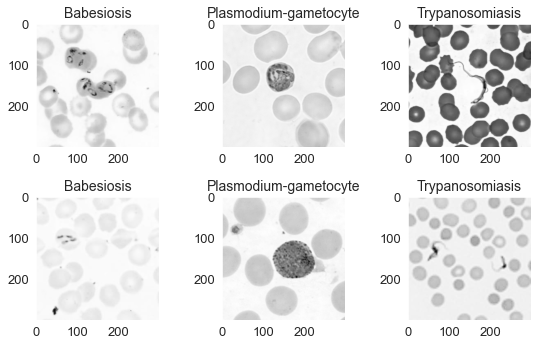

IndexError: index 46 is out of bounds for axis 0 with size 36

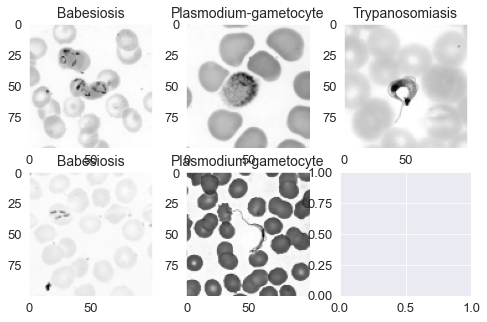

In [7]:
# Original data
plt.figure(figsize=(8,5))

plt.subplot(2,3,1); plt.imshow(data[0,:,:], cmap='Greys_r'); plt.title('Babesiosis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,4); plt.imshow(data[10,:,:], cmap='Greys_r'); plt.title('Babesiosis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,2); plt.imshow(data[18,:,:], cmap='Greys_r'); plt.title('Plasmodium-gametocyte', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,5); plt.imshow(data[26,:,:], cmap='Greys_r'); plt.title('Plasmodium-gametocyte', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,3); plt.imshow(data[34,:,:], cmap='Greys_r'); plt.title('Trypanosomiasis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,6); plt.imshow(data[46,:,:], cmap='Greys_r'); plt.title('Trypanosomiasis', fontdict={'fontsize':14}); plt.grid(False)

plt.tight_layout()
plt.show()

# Smaller data
plt.figure(figsize=(8,5))

plt.subplot(2,3,1); plt.imshow(data_resized[0,:,:], cmap='Greys_r'); plt.title('Babesiosis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,4); plt.imshow(data_resized[10,:,:], cmap='Greys_r'); plt.title('Babesiosis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,2); plt.imshow(data_resized[18,:,:], cmap='Greys_r'); plt.title('Plasmodium-gametocyte', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,5); plt.imshow(data_resized[26,:,:], cmap='Greys_r'); plt.title('Plasmodium-gametocyte', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,3); plt.imshow(data_resized[34,:,:], cmap='Greys_r'); plt.title('Trypanosomiasis', fontdict={'fontsize':14}); plt.grid(False)
plt.subplot(2,3,6); plt.imshow(data_resized[46,:,:], cmap='Greys_r'); plt.title('Trypanosomiasis', fontdict={'fontsize':14}); plt.grid(False)

plt.tight_layout()
plt.show()


## Define useful variables for deep learning model

In [5]:
# Set device where to run the model. GPU if available, otherwise cpu (very slow with deep learning models)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ',device)

# Define useful variables
print('Defining variables...')
models_trained_path = 'models_trained/'
if not os.path.exists(models_trained_path):                 # create a directory where to save the best model
    os.makedirs(models_trained_path)

best_acc = 0.0
num_epochs = 30                                   # number of epochs
n_classes = len(np.unique(labels))                # number of classes in the dataset
lab_classes = ['Babesiosis','Plasmodium','Trypanosomiasis']

# Variables to store the resuts
losses = []
acc_train = []
pred_label_train = torch.empty((0)).to(device)    # .to(device) to move the data/model on GPU or CPU (default)
true_label_train = torch.empty((0)).to(device)

# Loss function
print('Defining loss function...')
criterion = torch.nn.CrossEntropyLoss()

# Scattering
print('Defining scattering...')
L = 8
J = 2
scattering = Scattering2D(J=J, shape=(data_train.shape[1],data_train.shape[2] ),L=L)
K = 81              # Input channels for the ScatNet
scattering = scattering.to(device)

# Model
print('Defining model...')
model = ScatNet2D(input_channels=K, scattering=scattering).to(device)




# Print model and number of parameters
print('-'*50)
print(model)
print(summary(model))

Device:  cuda
Defining variables...
Defining loss function...
Defining scattering...
Defining model...
--------------------------------------------------
ScatNet2D(
  (scattering): Scattering2D()
  (classifier): Sequential(
    (0): Linear(in_features=50625, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=3, bias=True)
    (5): ReLU()
  )
)
Layer (type:depth-idx)                   Param #
ScatNet2D                                --
├─Scattering2D: 1-1                      --
├─Sequential: 1-2                        --
│    └─Linear: 2-1                       51,841,024
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       1,049,600
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       3,075
│    └─ReLU: 2-6                         --
Total params: 52,893,699
Trainable params: 52,893,699
Non-trainable p

## Train the ScatNet 2D to classify images

In [12]:
best_epoch = 0
num_epochs = 300
acc_train = []
losses = []
pred_label_train = np.empty(0)
true_label_train = np.empty(0)

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Optimizer
print('Defining optimizer...')
lr = 0.001                                         # learning rate
optim = torch.optim.Adam(model.parameters(),lr=lr)

for epoch in range(num_epochs):
    # Train step
    model.train()                                                   # tells to the model you are in training mode (batchnorm and dropout layers work)
    for data_tr in trainset:
        
        # Define the training loop
        # TO DO
        data = data_tr[0].to(device)
        labels = data_tr[1].to(torch.long).to(device)

        output = model(data)
        loss = criterion(output, labels)

        optim.zero_grad()
        loss.backward()
        optim.step()

        output_cpu = output.detach().cpu().numpy()
        labels_cpu = labels.detach().cpu().numpy()
        pred_label_train = np.concatenate((pred_label_train,output_cpu.argmax(1) ),axis=0)
        true_label_train = np.concatenate((true_label_train,labels_cpu ),axis=0)
        

    losses.append(loss.cpu().detach().numpy())
    acc_t = accuracy_score(true_label_train,pred_label_train)
    pred_label_train = np.empty(0)
    true_label_train = np.empty(0)

    acc_train.append(acc_t)
    if epoch%20 == 0:
        # print("  epoch : {}/{}, loss = {:.4f} - acc = {:.4f}".format(epoch + 1, num_epochs, loss, acc_t))
        print(f'EPOCH: {epoch}, LOSS: {loss}')
    
    # Save the model with best accuracy across the epoch
    # TO DO
    if acc_t > max(acc_train):
        torch.save(model.state_dict(), './models_trained/model.pt')


    # Reinitialize the variables to compute accuracy
    pred_label_train = torch.empty((0)).to(device)
    true_label_train = torch.empty((0)).to(device)

print('-'*30)
print('Best model accuracy is {} at epoch {}/{}'.format(round(best_acc,3), best_epoch+1, num_epochs))


Defining optimizer...
EPOCH: 0, LOSS: 1.0986123085021973


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

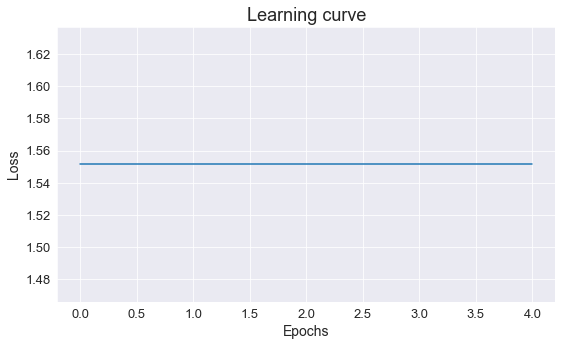

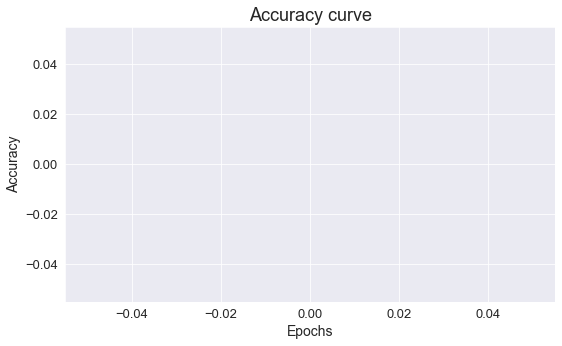

In [34]:
# Plot the results
plt.figure(figsize=(8,5))
plt.plot(list(range(num_epochs)), losses)
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(list(range(num_epochs)), acc_train)
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Test the trained model

In [ ]:
model_test = ...                # Initialize a new model
...                             # Load the model

pred_label_test = torch.empty((0,n_classes)).to(device)
true_label_test = torch.empty((0)).to(device)

model_test.eval()
with torch.no_grad():
  for data in testset:
    
    # TO DO
    ...
    
    pred_label_test = torch.cat((pred_label_test,output_test),dim=0)
    true_label_test = torch.cat((true_label_test,y_te),dim=0)

compute_metrics(y_true=true_label_test,y_pred=pred_label_test,lab_classes=lab_classes)    # function to compute the metrics (accuracy and confusion matrix)


## Visualize the kernels

In [ ]:
from colorsys import hls_to_rgb
from scipy.fft import fft2

In [ ]:
def colorize(z):
    n, m = z.shape
    c = np.zeros((n, m, 3))
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)

    idx = ~(np.isinf(z) + np.isnan(z))
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    B = 1.0/(1.0 + abs(z[idx])**0.3)
    c[idx] = [hls_to_rgb(a, b, 0.8) for a, b in zip(A, B)]
    return c

In [ ]:
fig, axs = plt.subplots(J, L, sharex=True, sharey=True, )
fig.set_figheight(5)
fig.set_figwidth(12)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
i = 0
for filter in scattering.psi:
    f = filter["levels"][0]
    filter_c = fft2(f)
    filter_c = np.fft.fftshift(filter_c)
    axs[i // L, i % L].imshow(colorize(filter_c))
    axs[i // L, i % L].axis('off')
    axs[i // L, i % L].set_title("$j = {}$ \n $\\theta={}$".format(i // L, i % L), fontsize=12)
    i = i+1

fig.suptitle(r"Wavelets for each scales $j$ and angles $\theta$ used"
             "\nColor saturation and color hue respectively denote complex magnitude and complex phase", fontsize=16)
plt.tight_layout()
plt.show()

Display the low-pass filter

In [ ]:
f = scattering.phi["levels"][0]
filter_c = fft2(f)
filter_c = np.fft.fftshift(filter_c)
filter_c = np.abs(filter_c)

plt.figure(figsize=(5,5))
plt.imshow(filter_c, cmap='Greys'); plt.grid(False); plt.title('Low-pass filter (scaling function)')
#plt.imshow(np.log(filter_c), cmap='Greys'); plt.grid(False); plt.title('Low-pass filter (scaling function)')
plt.show()